In [2]:
ls

Analyze design accuracies.ipynb
Check preferred neighbors assignment for golfy 1.5.0.ipynb
Deconvolution.ipynb
Experiment with allow_extra_pools.ipynb
First stab.ipynb
Large numbers of peptides per pool.ipynb
Number of pools and iters for different params.ipynb
Slower second attempt.ipynb
Third swing.ipynb
designs.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("designs.csv")

/Users/iskander/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


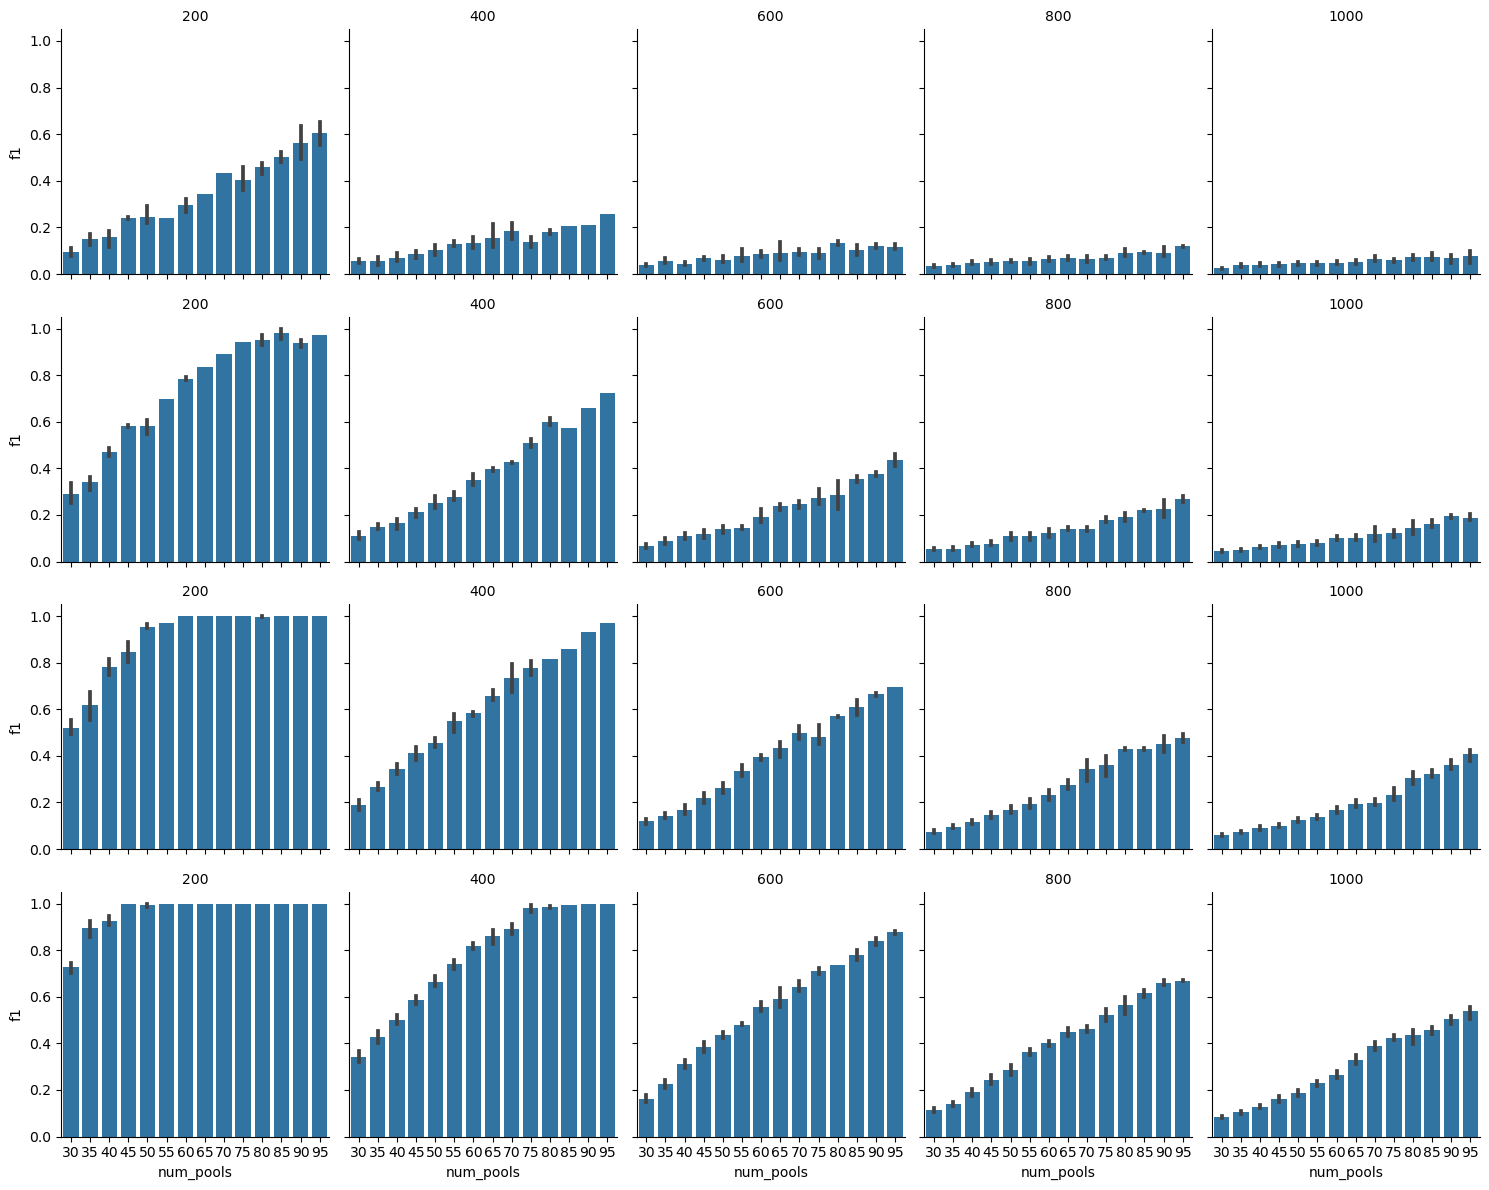

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.barplot, "num_pools", "f1")
# bp.add_legend()
bp.set_titles("{col_name}")

plt.show()


In [8]:
df

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations
0,200,5,2,True,0.961,1.000,0.978,80,0
1,200,5,2,False,1.000,1.000,1.000,80,0
2,200,6,2,True,0.930,0.993,0.956,68,0
3,200,6,2,False,0.946,0.987,0.963,68,0
4,200,7,2,True,0.834,0.949,0.881,58,0
...,...,...,...,...,...,...,...,...,...
3048,1000,199,2,False,0.034,0.015,0.020,12,27630
3049,1000,199,3,True,0.365,0.502,0.418,96,0
3050,1000,199,3,False,0.083,0.054,0.063,18,77328
3051,1000,199,4,False,0.057,0.048,0.051,24,147296


In [25]:
df[(df.num_peptides == 400) & (df.f1 == 1.0)]

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations
283,400,17,4,False,1.0,1.0,1.0,96,128
289,400,18,4,False,1.0,1.0,1.0,92,54
294,400,19,4,True,1.0,1.0,1.0,93,0
295,400,19,4,False,1.0,1.0,1.0,88,102
306,400,21,4,True,1.0,1.0,1.0,90,0
307,400,21,4,False,1.0,1.0,1.0,80,412
312,400,22,4,True,1.0,1.0,1.0,92,0
314,400,22,5,False,1.0,1.0,1.0,95,1996
319,400,23,4,True,1.0,1.0,1.0,94,0
321,400,23,5,False,1.0,1.0,1.0,90,2532


In [27]:
df_600 = df[df.num_peptides == 600]

In [29]:
df_600_5 = df_600[df_600.num_replicates == 5]


<Axes: xlabel='max_peptides_per_pool', ylabel='f1'>

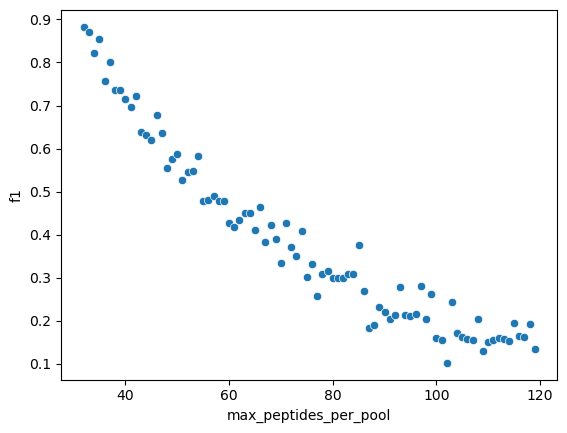

In [31]:
sns.scatterplot(data=df_600_5, x="max_peptides_per_pool", y="f1")

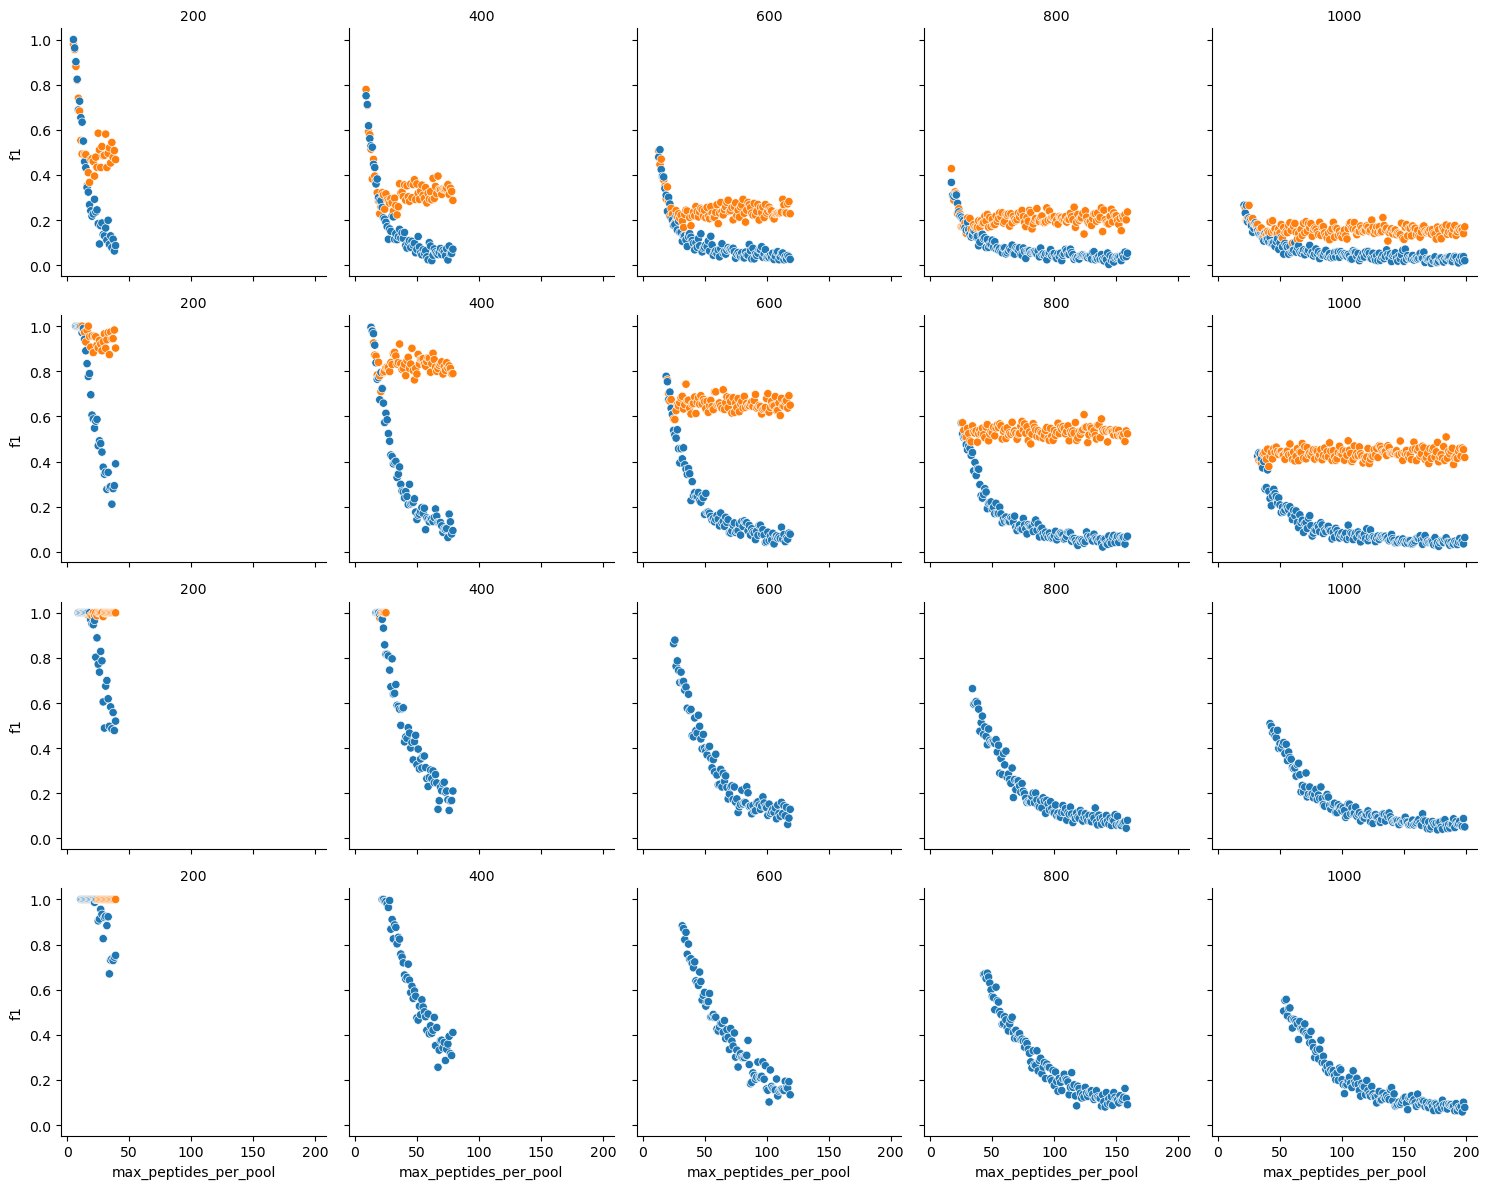

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.scatterplot, "max_peptides_per_pool", "f1", "allow_extra_pools")
# bp.add_legend()
bp.set_titles("{col_name}")

plt.show()

In [37]:
df["mean_peptides_per_pool"] = (df.num_peptides * df.num_replicates) / (df.num_pools)

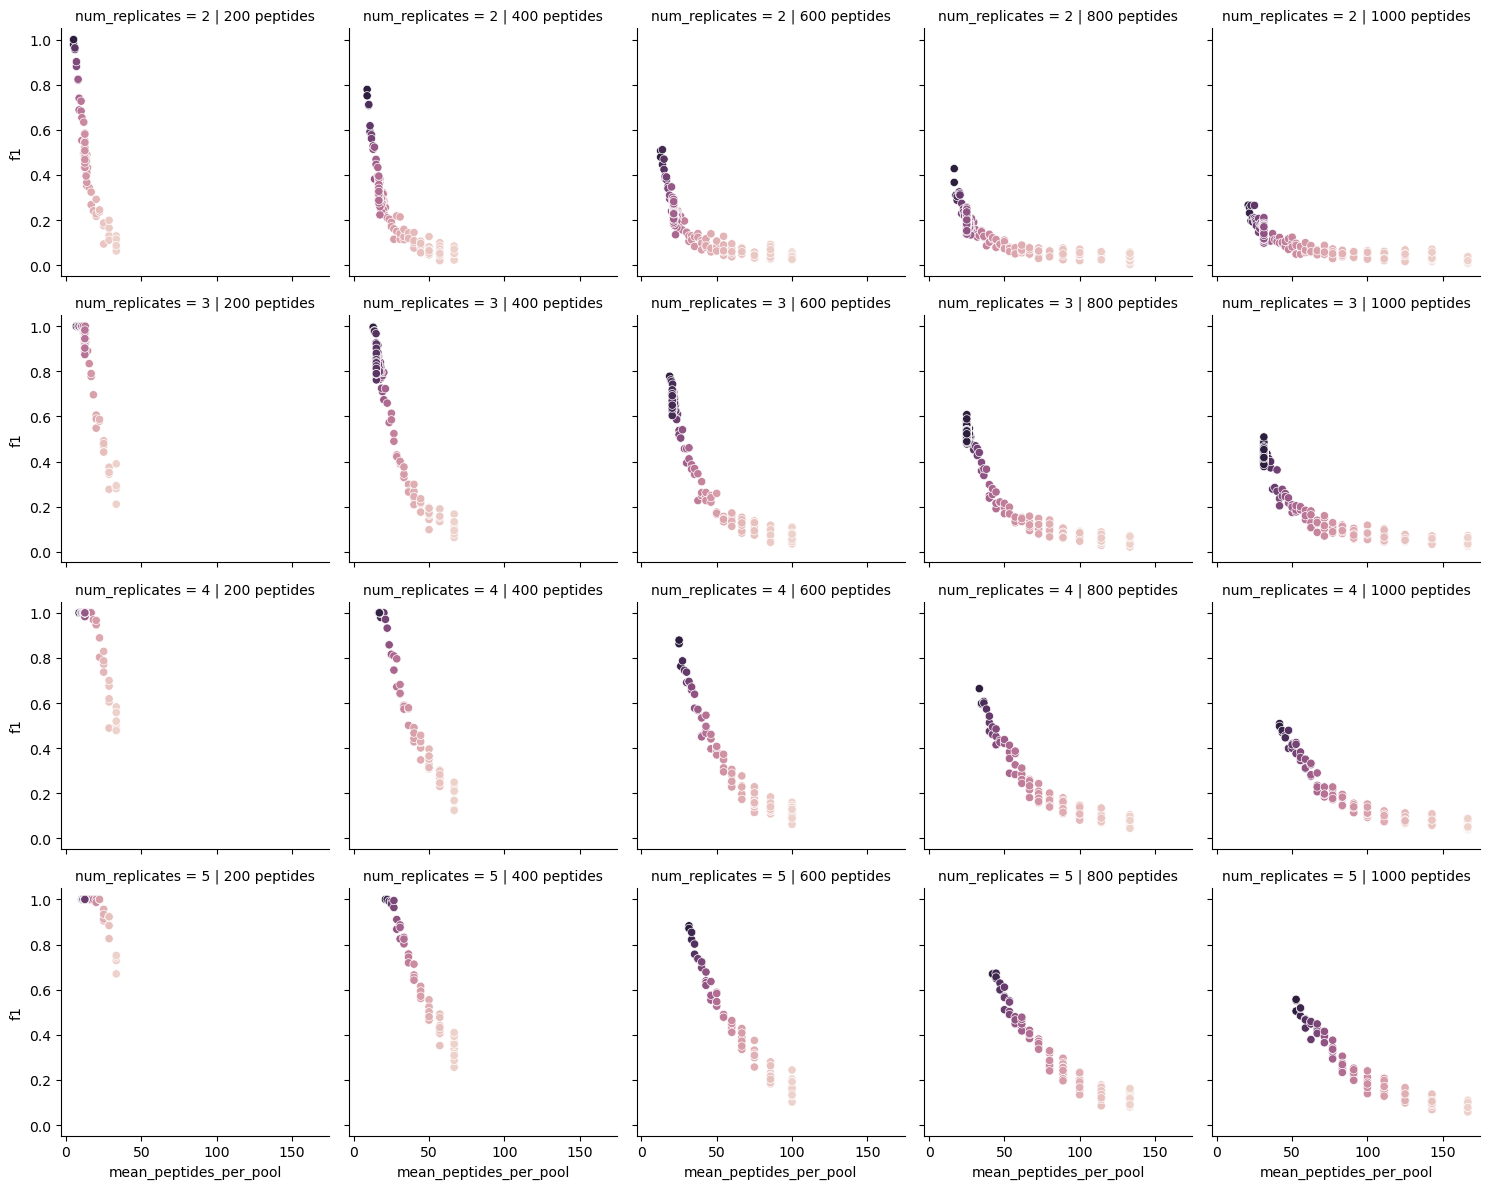

In [44]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.scatterplot, "mean_peptides_per_pool", "f1", "num_pools")
# bp.add_legend()
bp.set_titles(col_template="{col_name} peptides")

plt.show()


In [45]:
grid.savefig("f1-grid.png")

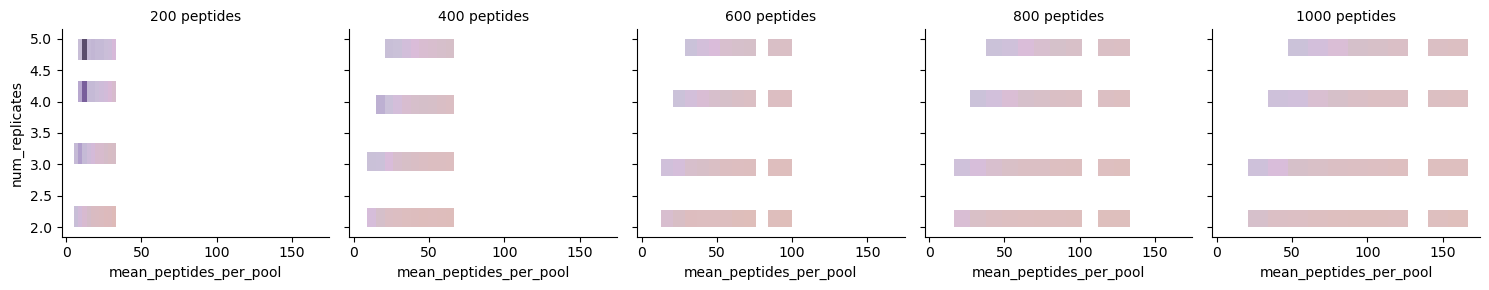

In [48]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.histplot,  "mean_peptides_per_pool", "num_replicates", "f1")
# bp.add_legend()
bp.set_titles(col_template="{col_name} peptides")

plt.show()


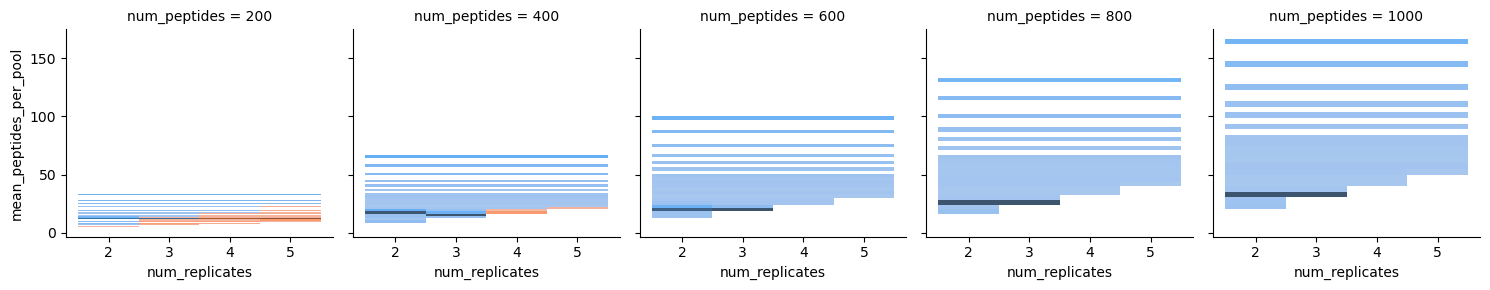

In [70]:
df['num_violations'] = df.num_violations.astype(int)
df['num_peptides'] = df.num_peptides.astype(int)
df['num_replicates'] = df.num_replicates.astype(int)

df["perfect_deconv"] = (df.f1 > 0.999)

df["no_violations"] = (df.num_violations == 0)
grid = sns.FacetGrid(df,  col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(
    sns.histplot,   
    "num_replicates",  
    "mean_peptides_per_pool", 
    "perfect_deconv",
    bins=30, 
    discrete=(True, False), 
    log_scale=(False, False))

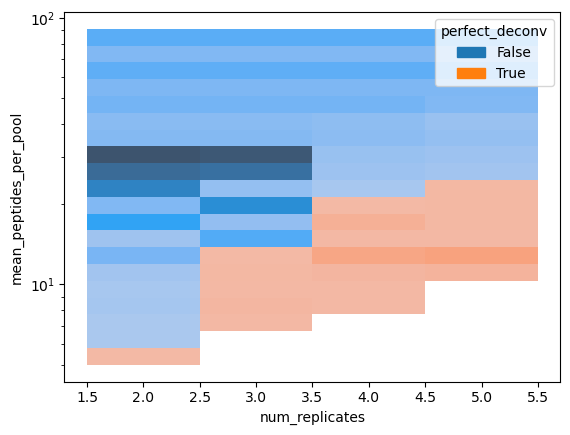

In [89]:
df['num_violations'] = df.num_violations.astype(int)
df['num_peptides'] = df.num_peptides.astype(int)
df['num_replicates'] = df.num_replicates.astype(int)

df["perfect_deconv"] = (df.f1 > 0.999)

df["no_violations"] = (df.num_violations == 0)
df["has_violations"] = (df.num_violations > 0)

bp = sns.histplot(
    data=df[(df.mean_peptides_per_pool < 100)],
    x="num_replicates",  
    y="mean_peptides_per_pool", 
    hue="perfect_deconv",
    bins=20, 
    discrete=(True, False), 
    log_scale=(False, True))

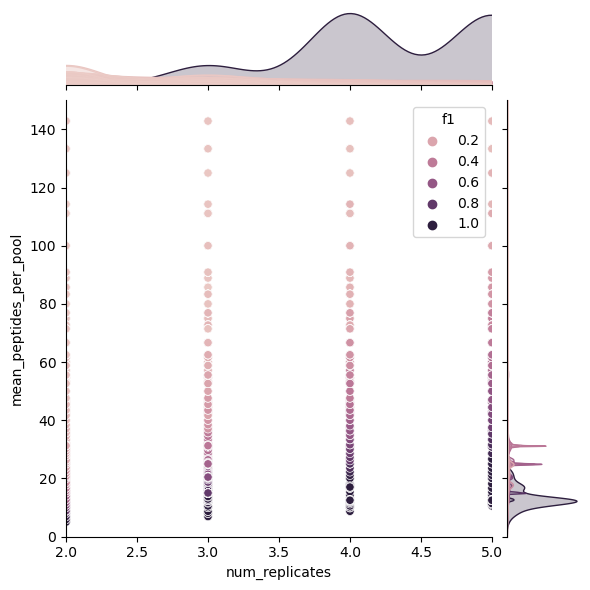

In [94]:
sns.jointplot(    
    data=df,
    x="num_replicates",  
    y="mean_peptides_per_pool", 
    hue="f1",
    
    xlim=[2, 5],
    ylim=[0, 150],
)

In [98]:
df

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations,mean_peptides_per_pool,perfect_deconv,no_violations,has_violations
0,200,5,2,True,0.961,1.000,0.978,80,0,5.000000,False,True,False
1,200,5,2,False,1.000,1.000,1.000,80,0,5.000000,True,True,False
2,200,6,2,True,0.930,0.993,0.956,68,0,5.882353,False,True,False
3,200,6,2,False,0.946,0.987,0.963,68,0,5.882353,False,True,False
4,200,7,2,True,0.834,0.949,0.881,58,0,6.896552,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,1000,199,2,False,0.034,0.015,0.020,12,27630,166.666667,False,False,True
3049,1000,199,3,True,0.365,0.502,0.418,96,0,31.250000,False,True,False
3050,1000,199,3,False,0.083,0.054,0.063,18,77328,166.666667,False,False,True
3051,1000,199,4,False,0.057,0.048,0.051,24,147296,166.666667,False,False,True


<Axes: xlabel='None-num_replicates-mean_peptides_per_pool'>

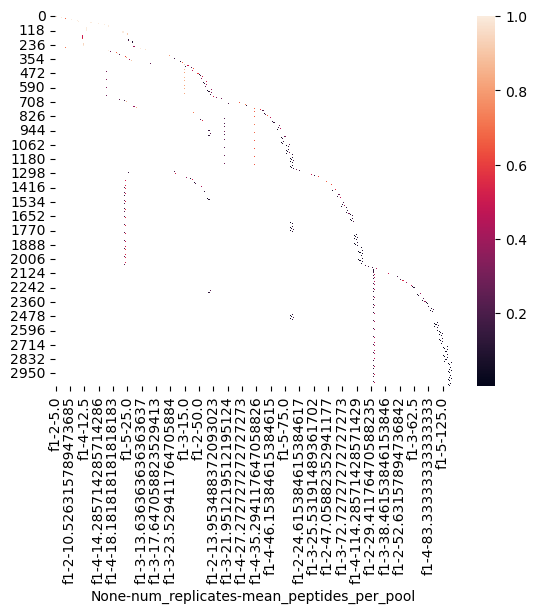

In [105]:
sns.heatmap()

<Axes: >

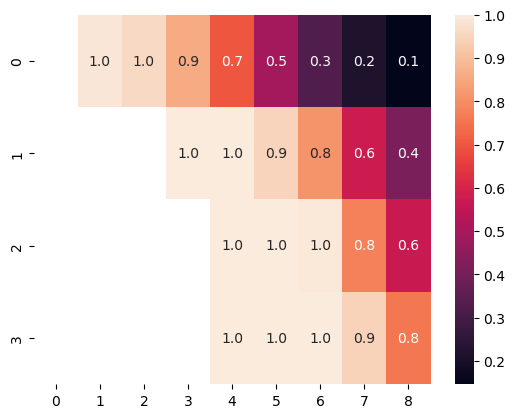

In [129]:
import numpy as np
base = 1.5
minval = int(np.log2(5) / np.log2(base))
m = int(np.log2(166) / np.log2(base)) - minval
x = np.zeros((4, m), dtype='float')
for r in range(2, 6):
    for i in range(m):
        ii = base ** i + minval
        iii = base ** (i + 1) + minval
        df_subset = df[(df.num_replicates == r) & (df.mean_peptides_per_pool > ii) & (df.mean_peptides_per_pool < iii)]
        if len(df_subset) > 0:
            x[r-2, i] = df_subset.f1.mean()
x[x == 0] = np.nan     
sns.heatmap(x, annot=True, fmt="0.1f")

In [123]:
np.log2(166)/np.log2(1.5)

12.60771318204978

In [131]:
df_6_to_10 = pd.read_csv("designs-replicates-6-to-10.csv")
df_2_to_5 = pd.read_csv("designs-96-wells-replicates-2-to-5.csv")
df = pd.concat([df_2_to_5, df_6_to_10])

In [219]:
df_6_to_10 = pd.read_csv("designs-96-wells-replicates-6-to-10.csv")
df_2_to_5 = pd.read_csv("designs-96-wells-replicates-2-to-5.csv")
df = pd.concat([df_2_to_5, df_6_to_10])
df.to_csv("designs-96-wells-combined-replicates.csv")

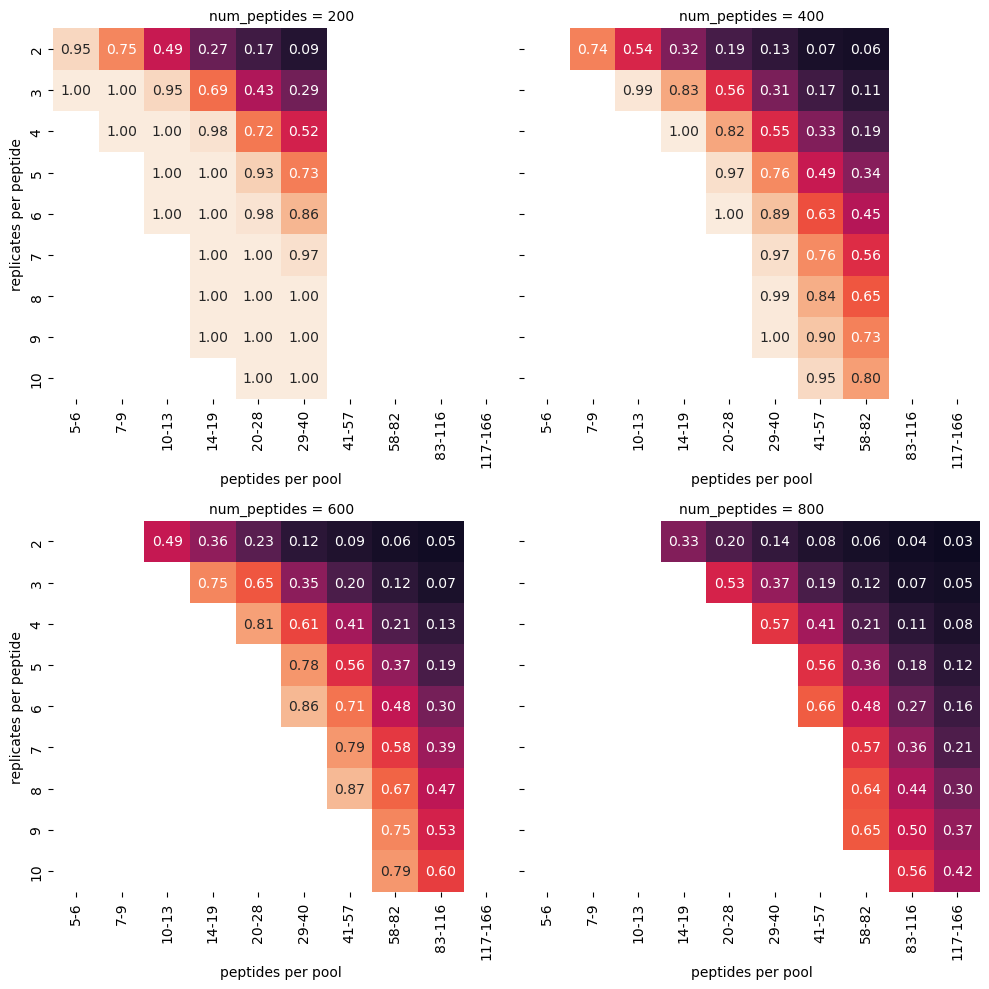

In [220]:
df = pd.read_csv("designs-96-wells-combined-replicates.csv")
df["mean_peptides_per_pool"] = df.num_replicates * df.num_peptides / df.num_pools
df['num_violations'] = df.num_violations.astype(int)
df['num_peptides'] = df.num_peptides.astype(int)
df['num_replicates'] = df.num_replicates.astype(int)

df["perfect_deconv"] = (df.f1 > 0.999)

df["no_violations"] = (df.num_violations == 0)
df["has_violations"] = (df.num_violations > 0)

import numpy as np
import matplotlib.pyplot as plt

num_bins = 10
r_min = df.num_replicates.min()
r_max = df.num_replicates.max()
rs = np.arange(r_min, r_max + 1)
num_rs = len(rs)

base = 1.5
mppp_min = df.mean_peptides_per_pool.min()
mppp_max = df.mean_peptides_per_pool.max()

mppp_min_log = np.log2(mppp_min) / np.log2(base)
mppp_max_log = np.log2(mppp_max) / np.log2(base)

mppp_log_bin_boundaries = np.linspace(mppp_min_log, mppp_max_log, num_bins + 1)
mppp_bin_boundaries = base ** mppp_log_bin_boundaries 

int_bins = mppp_bin_boundaries.round().astype(int)
xticklabels = ["%s-%s" % (x, y - 1) for (x, y) in zip(int_bins[:-1], int_bins[1:])]

def draw_heatmap(*args, **kwargs):
    df_curr = kwargs.pop('data')
    x = np.zeros((num_rs, num_bins), dtype='float')

    for r in rs:
        for i, bin_min in enumerate(mppp_bin_boundaries):
            if i == len(bins) - 1:
                continue 
            bin_max = mppp_bin_boundaries[i + 1]

            df_subset = df_curr[
                (df_curr.num_replicates == r) & 
                (df_curr.mean_peptides_per_pool >= bin_min) & 
                (df_curr.mean_peptides_per_pool < bin_max)]
            if len(df_subset) > 0:
                x[r-r_min, i] = df_subset.f1.mean()
    x[x == 0] = np.nan    
    sns.heatmap(x, 
                annot=True, 
                fmt="0.2f", 
                xticklabels=xticklabels,
                yticklabels=rs, 
                vmin=0, 
                vmax=1, 
                cbar=False)
    plt.xlabel("peptides per pool")
    plt.ylabel("replicates per peptide")
fg = sns.FacetGrid(df[df.num_peptides < 1000], col='num_peptides', col_wrap=2, height=5, sharex=False)
fg.map_dataframe(draw_heatmap)
fg.savefig("heatmaps.png")


In [146]:
df.num_replicates.value_counts()

2     1069
3     1005
4      512
5      467
6      411
7      367
8      348
9      300
10     264
Name: num_replicates, dtype: int64

In [190]:
df[(df.num_peptides > 400) & (df.f1 > 0.99)]

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations,perfect_deconv,no_violations,has_violations,mean_peptides_per_pool


In [223]:
df['log_violations'] = (np.log(1 + df.num_violations))

TypeError: Image data of dtype object cannot be converted to float

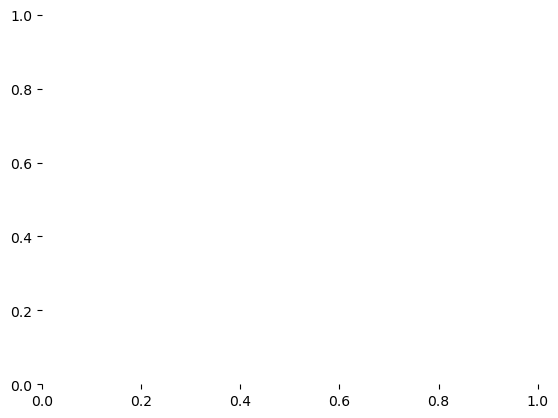

In [225]:
sns.heatmap(data=df, x="log_violations", y="f1")

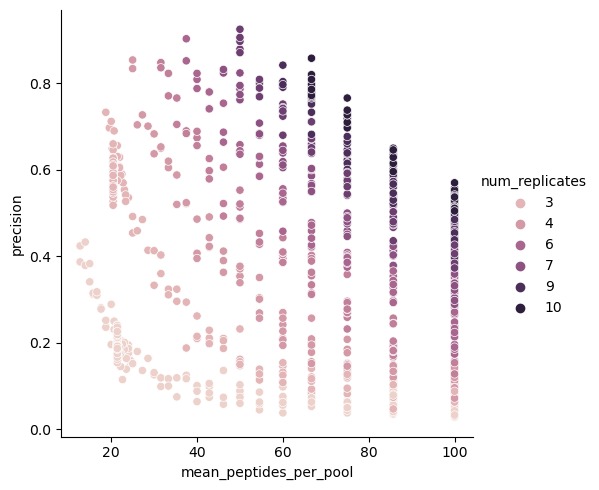

In [232]:
sns.relplot(data=df[df.num_peptides == 600], x="mean_peptides_per_pool", y="precision", hue="num_replicates")

In [229]:
df[df.num_peptides == 600]

,Unnamed: 0,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations,mean_peptides_per_pool,perfect_deconv,no_violations,has_violations,log_violations
660,660,600,13,2,True,0.424,0.644,0.507,94,0,12.765957,False,True,False,0.000000
661,661,600,13,2,False,0.387,0.632,0.479,94,0,12.765957,False,True,False,0.000000
662,662,600,14,2,True,0.379,0.552,0.446,86,0,13.953488,False,True,False,0.000000
663,663,600,14,2,False,0.433,0.639,0.512,86,0,13.953488,False,True,False,0.000000
664,664,600,15,2,True,0.383,0.615,0.470,80,0,15.000000,False,True,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,669,600,119,6,False,0.224,0.273,0.242,36,118318,100.000000,False,False,True,11.681140
3723,670,600,119,7,False,0.298,0.368,0.324,42,157646,100.000000,False,False,True,11.968114
3724,671,600,119,8,False,0.426,0.485,0.449,48,200094,100.000000,False,False,True,12.206548
3725,672,600,119,9,False,0.485,0.578,0.521,54,245322,100.000000,False,False,True,12.410331


In [233]:
df[df.num_peptides == 600].num_replicates.value_counts()

2     214
3     201
4      95
5      88
6      82
7      73
8      70
9      60
10     53
Name: num_replicates, dtype: int64

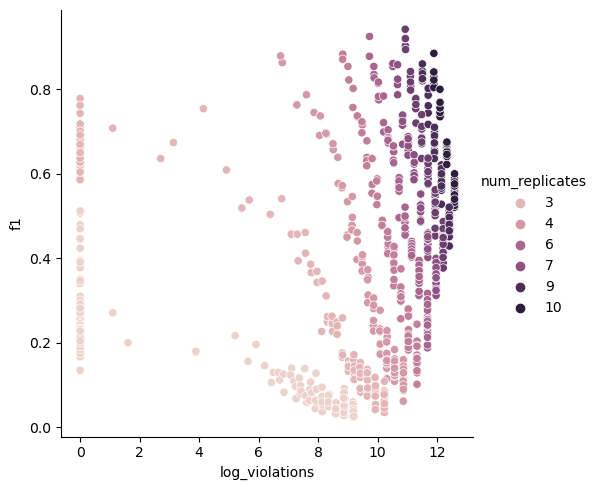

In [234]:
sns.relplot(data=df[df.num_peptides == 600], x="log_violations", y="f1", hue="num_replicates")

In [239]:
df[(df.num_peptides == 600) & (df.num_violations == 0) & (df.f1 > 0.7)]

,Unnamed: 0,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations,mean_peptides_per_pool,perfect_deconv,no_violations,has_violations,log_violations
674,674,600,19,3,False,0.733,0.852,0.778,96,0,18.750000,False,True,False,0.0
677,677,600,20,3,True,0.697,0.864,0.762,92,0,19.565217,False,True,False,0.0
681,681,600,21,3,True,0.649,0.788,0.702,89,0,20.224719,False,True,False,0.0
750,750,600,35,3,True,0.690,0.830,0.743,87,0,20.689655,False,True,False,0.0
888,888,600,58,3,True,0.659,0.787,0.709,88,0,20.454545,False,True,False,0.0
894,894,600,59,3,True,0.646,0.812,0.709,88,0,20.454545,False,True,False,0.0
930,930,600,65,3,True,0.660,0.812,0.718,88,0,20.454545,False,True,False,0.0
1146,1146,600,101,3,True,0.628,0.817,0.701,88,0,20.454545,False,True,False,0.0


In [240]:
df[(df.num_peptides == 600) & (df.num_violations == 0) & (df.f1 < 0.2)]

,Unnamed: 0,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations,mean_peptides_per_pool,perfect_deconv,no_violations,has_violations,log_violations
695,695,600,25,2,True,0.152,0.215,0.177,49,0,24.489796,False,True,False,0.0
700,700,600,26,2,True,0.159,0.230,0.187,49,0,24.489796,False,True,False,0.0
730,730,600,32,2,True,0.164,0.243,0.195,51,0,23.529412,False,True,False,0.0
736,736,600,33,2,True,0.139,0.214,0.167,51,0,23.529412,False,True,False,0.0
760,760,600,37,2,True,0.115,0.165,0.135,53,0,22.641509,False,True,False,0.0
772,772,600,39,2,True,0.145,0.227,0.175,54,0,22.222222,False,True,False,0.0
904,904,600,61,2,True,0.154,0.233,0.184,56,0,21.428571,False,True,False,0.0
1036,1036,600,83,2,True,0.162,0.242,0.191,56,0,21.428571,False,True,False,0.0


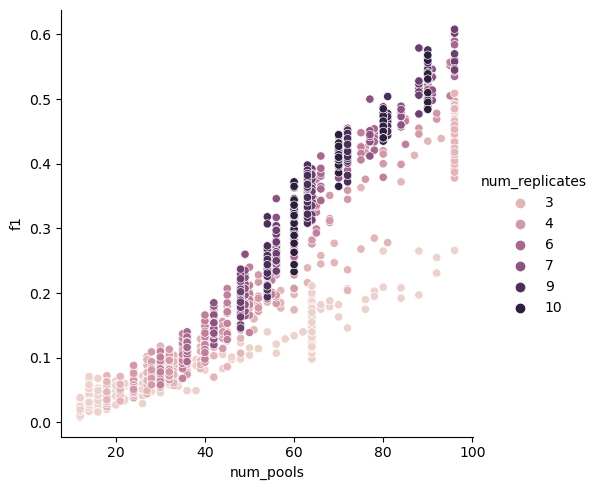

In [243]:
sns.relplot(data=df[df.num_peptides == 1000], x="num_pools", y="f1", hue="num_replicates")

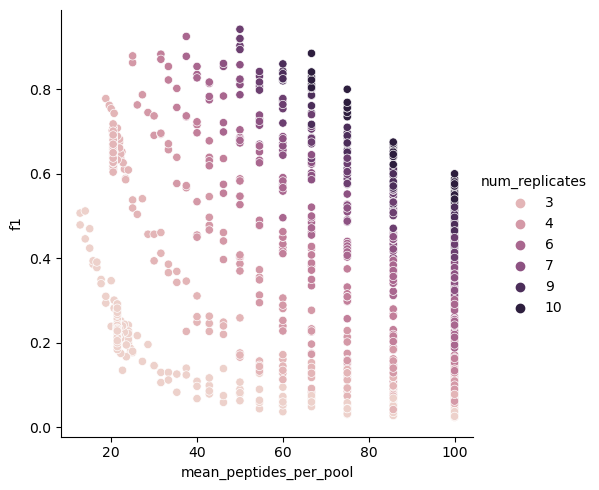

In [242]:
sns.relplot(data=df[df.num_peptides == 600], x="mean_peptides_per_pool", y="f1", hue="num_replicates")

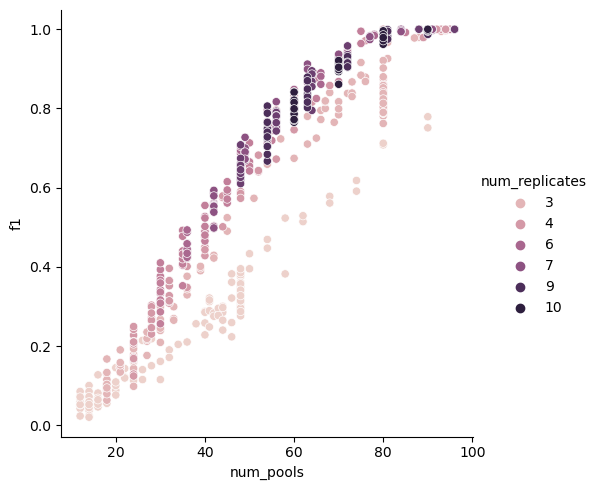

In [245]:
sns.relplot(data=df[df.num_peptides == 400], x="num_pools", y="f1", hue="num_replicates")

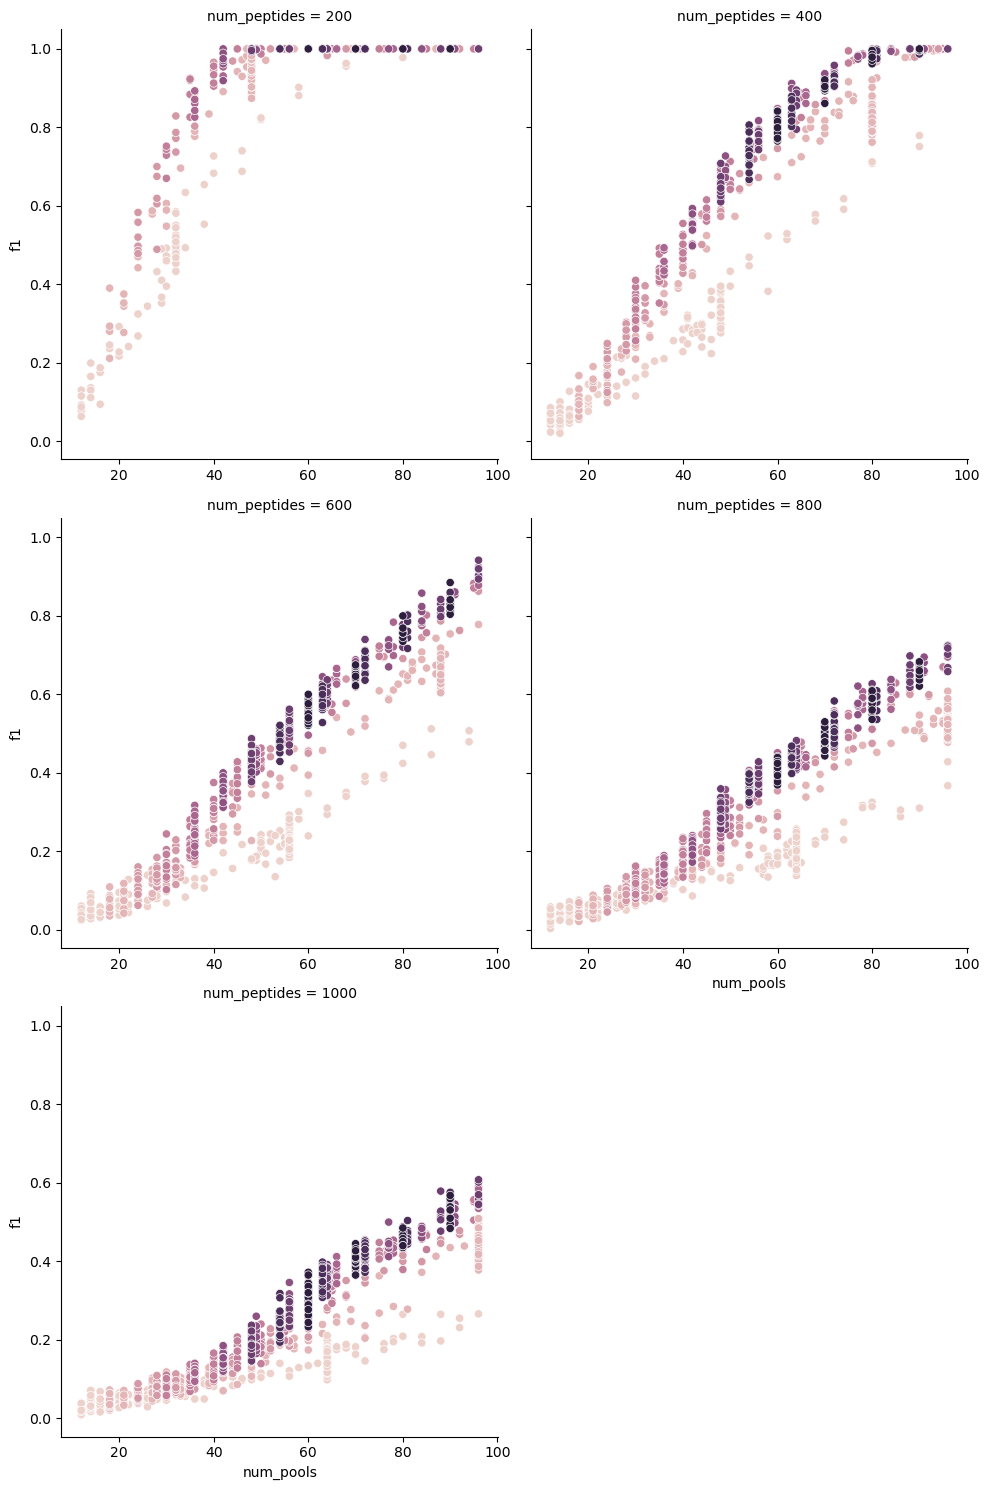

In [247]:
fg2 = sns.FacetGrid(df, col='num_peptides', col_wrap=2, height=5, sharex=False)
fg2.map_dataframe(sns.scatterplot, "num_pools", "f1", "num_replicates")
fg2.savefig("num-pools-vs-f1.png")

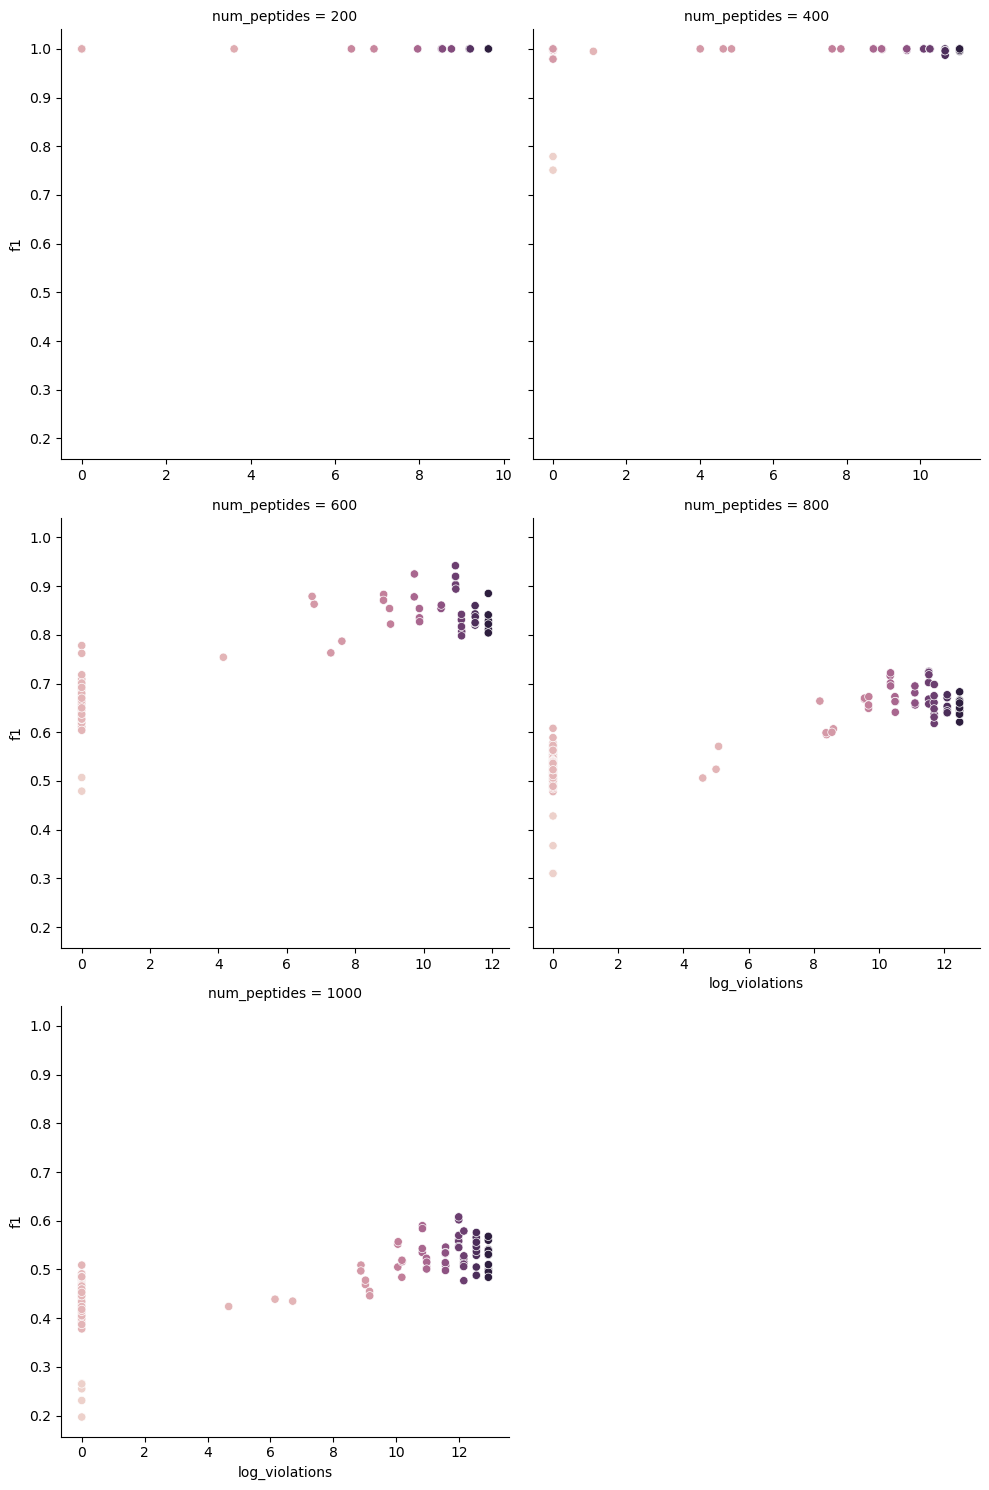

In [248]:
fg2 = sns.FacetGrid(df[df.num_pools >= 88], col='num_peptides', col_wrap=2, height=5, sharex=False)
fg2.map_dataframe(sns.scatterplot, "log_violations", "f1", "num_replicates")
fg2.savefig("log-violations-vs-f1.png")

In [249]:
import golfy

In [251]:
s.num_pools()

96

In [255]:
from golfy.evaluation import evaluate_design
from golfy.optimization import improve_solution
s = golfy.initialization.init(num_peptides = 600, num_replicates=4, max_peptides_per_pool=25, strategy='random')

history = [evaluate_design(s)]
for i in range(100):
    improve_solution(s)
    history.append(evaluate_design(s))

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e-03, tolerance: 2.709e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.097e-03, tolerance: 1.978e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.495e-03, tolerance: 1.935e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.145e-03, tolerance: 1.827e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.946e-03, tolerance: 2.709e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e-03, tolerance: 1.122e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.244e-03, tolerance: 2.570e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e-03, tolerance: 1.063e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.453e-03, tolerance: 1.290e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e-03, tolerance: 1.978e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e-03, tolerance: 1.933e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.249e-03, tolerance: 1.935e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e-02, tolerance: 2.665e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.503e-03, tolerance: 1.200e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.648e-03, tolerance: 1.915e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.547e-03, tolerance: 1.956e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.787e-03, tolerance: 1.935e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.460e-03, tolerance: 1.913e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e-03, tolerance: 2.107e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.070e-03, tolerance: 1.933e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

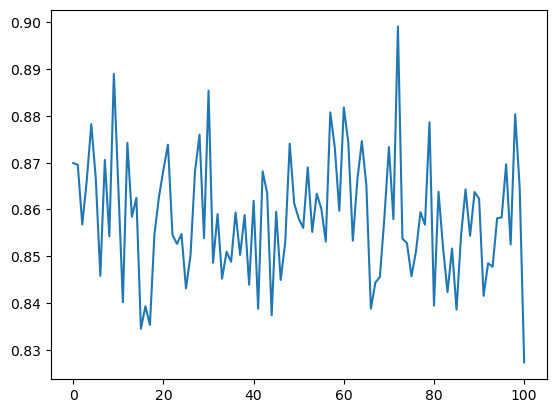

In [257]:
from matplotlib.pyplot import plot
plot(np.arange(101), [x.f1 for x in history])

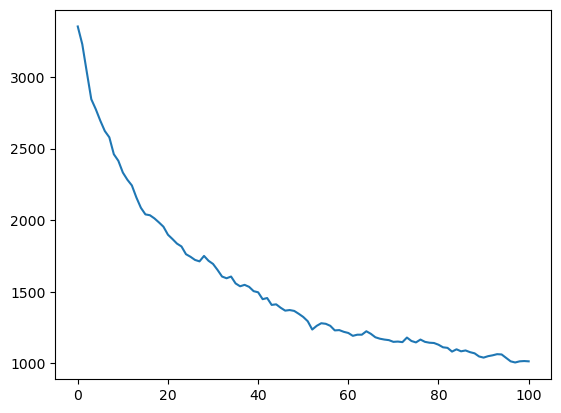

In [258]:
plot(np.arange(101), [x.num_violations for x in history])

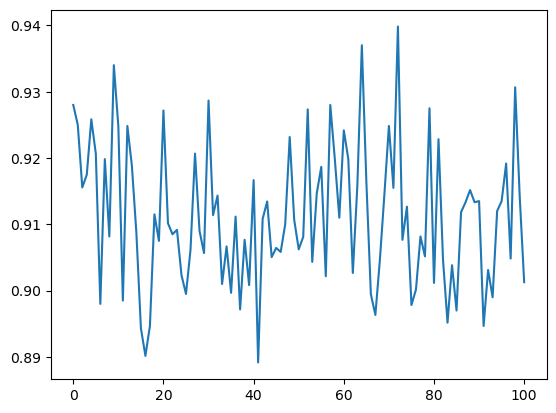

In [260]:
plot(np.arange(101), [x.recall for x in history])

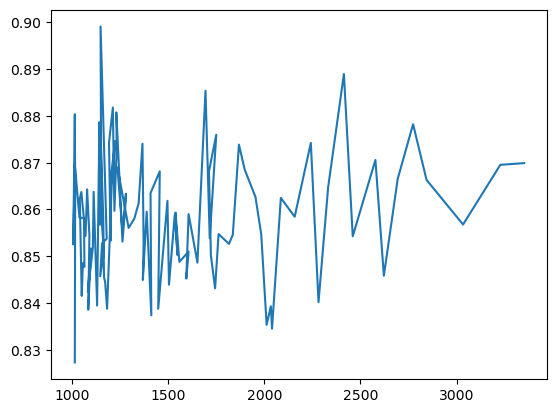

In [261]:
plot([x.num_violations for x in history], [x.f1 for x in history])

In [263]:
from golfy.evaluation import evaluate_design
from golfy.optimization import improve_solution
s = golfy.initialization.init(num_peptides = 600, num_replicates=3, max_peptides_per_pool=10, strategy='random')
print(s.num_pools())

history = [evaluate_design(s)]
for i in range(100):
    improve_solution(s)
    history.append(evaluate_design(s))

48


/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.214e-04, tolerance: 5.624e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.654e-03, tolerance: 7.000e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.148e-03, tolerance: 5.312e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e-03, tolerance: 8.000e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.524e-04, tolerance: 7.000e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.618e-03, tolerance: 5.624e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e-03, tolerance: 7.000e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e-03, tolerance: 7.000e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.125e-03, tolerance: 8.000e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.776e-03, tolerance: 7.000e-04
  model = cd_fast.enet_coordinate_descent(


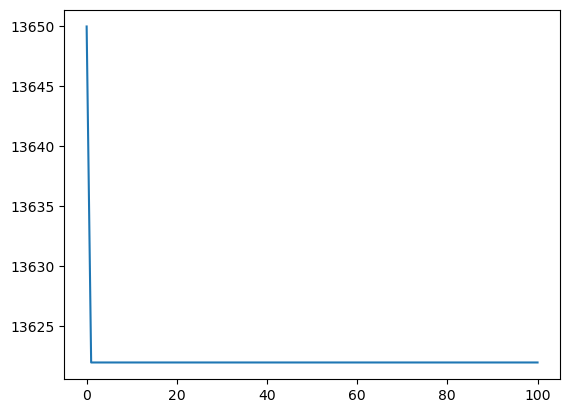

In [264]:
plot(np.arange(101), [x.num_violations for x in history])

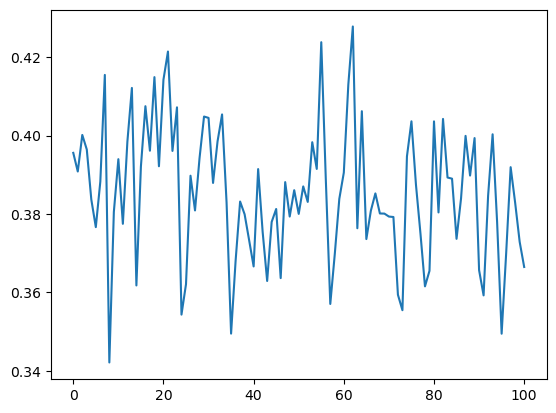

In [265]:
plot(np.arange(101), [x.f1 for x in history])

In [266]:
from golfy.evaluation import evaluate_design
from golfy.optimization import improve_solution
s = golfy.initialization.init(num_peptides = 600, num_replicates=3, max_peptides_per_pool=10, strategy='random')
print(s.num_pools())

history = [evaluate_design(s)]
for i in range(100):
    improve_solution(s)
    history.append(evaluate_design(s))

180


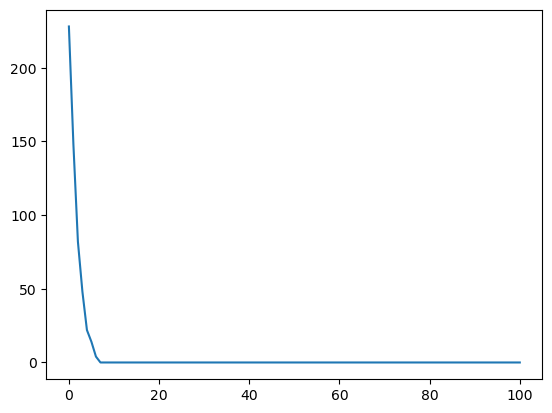

In [267]:
plot(np.arange(101), [x.num_violations for x in history])

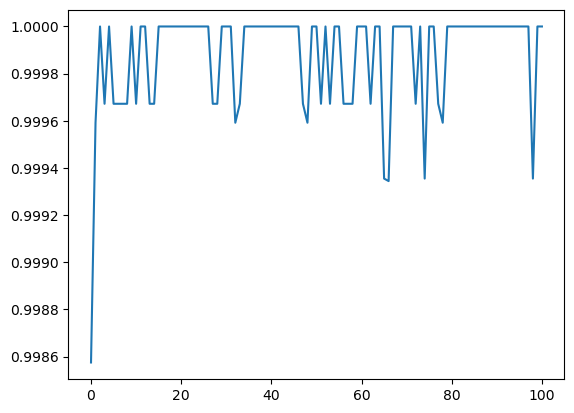

In [268]:
plot(np.arange(101), [x.f1 for x in history])

In [269]:
from golfy.evaluation import evaluate_design
from golfy.optimization import improve_solution
s = golfy.initialization.init(num_peptides = 400, num_replicates=2, max_peptides_per_pool=15, strategy='random')
print(s.num_pools())
history = [evaluate_design(s)]
for i in range(100):
    improve_solution(s)
    history.append(evaluate_design(s))

81


/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e-03, tolerance: 9.343e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e-03, tolerance: 9.333e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e-03, tolerance: 9.570e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.948e-03, tolerance: 1.600e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e-03, tolerance: 9.570e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e-03, tolerance: 1.750e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e-03, tolerance: 9.766e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.182e-03, tolerance: 9.556e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e-03, tolerance: 1.067e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.678e-03, tolerance: 1.529e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.724e-03, tolerance: 1.700e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.917e-03, tolerance: 1.650e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.308e-03, tolerance: 1.983e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e-03, tolerance: 2.025e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.267e-04, tolerance: 8.667e-04
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e-03, tolerance: 1.089e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

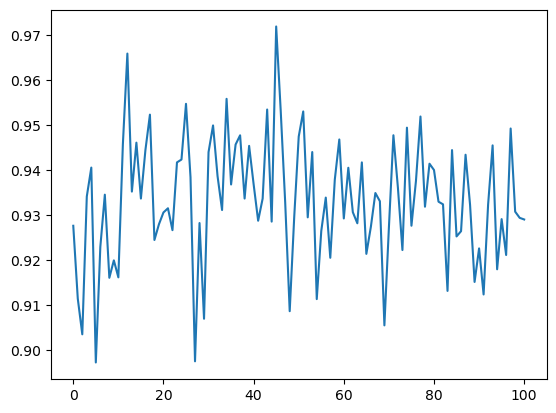

In [270]:
plot(np.arange(101), [x.f1 for x in history])

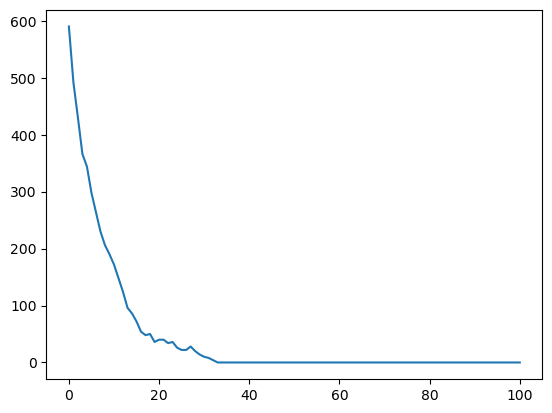

In [271]:
plot(np.arange(101), [x.num_violations for x in history])

In [290]:
from golfy.evaluation import evaluate_design
from golfy.optimization import improve_solution
num_peptides = 400
r = 3
max_peptides_per_pool=13
s = golfy.initialization.init(num_peptides = num_peptides, 
                              num_replicates=r, max_peptides_per_pool=max_peptides_per_pool, strategy='random')

print(s.num_pools())

peptides = np.arange(num_peptides)
for i in range(r):
    for g in range(num_peptides // max_peptides_per_pool):
        s.assignments[i][g] = peptides[g * max_peptides_per_pool:(g + 1) * max_peptides_per_pool]
        
history = [evaluate_design(s)]
for i in range(100):
    improve_solution(s)
    history.append(evaluate_design(s))

plot(np.arange(101), [x.num_violations for x in history])
plot(np.arange(101), [x.num_violations for x in history])

93


ValueError: Peptide 167 twice in replicate 1

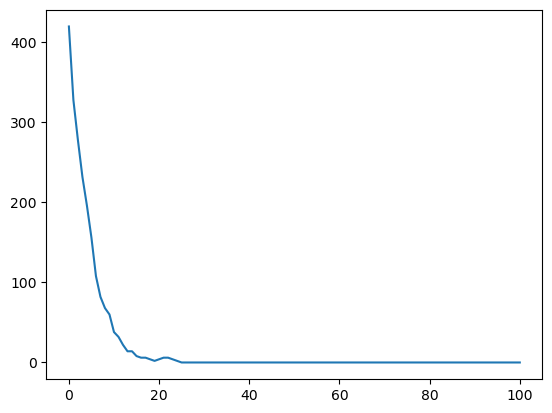

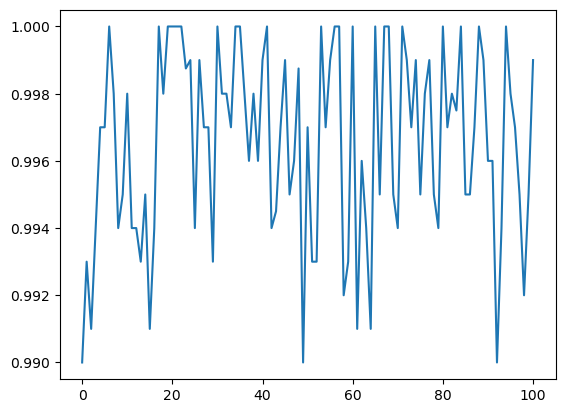

In [289]:
plot(np.arange(101), [x.recall for x in history])